In [96]:
from AD_vibration.data_loader import data_loader
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
from AD_vibration.features.build_features import compute_PSD
sensor=data_loader.Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
dl=data_loader.DataLoader(sensor=sensor)

start=datetime(2022,3,30,9,25,0)
end=start+timedelta(minutes=20)
data_spike=dl.get_data(start,end)

start=datetime(2022,4,7,11,1 ,0)
end=start+timedelta(minutes=20)
data_no_spike=dl.get_data(start,end)


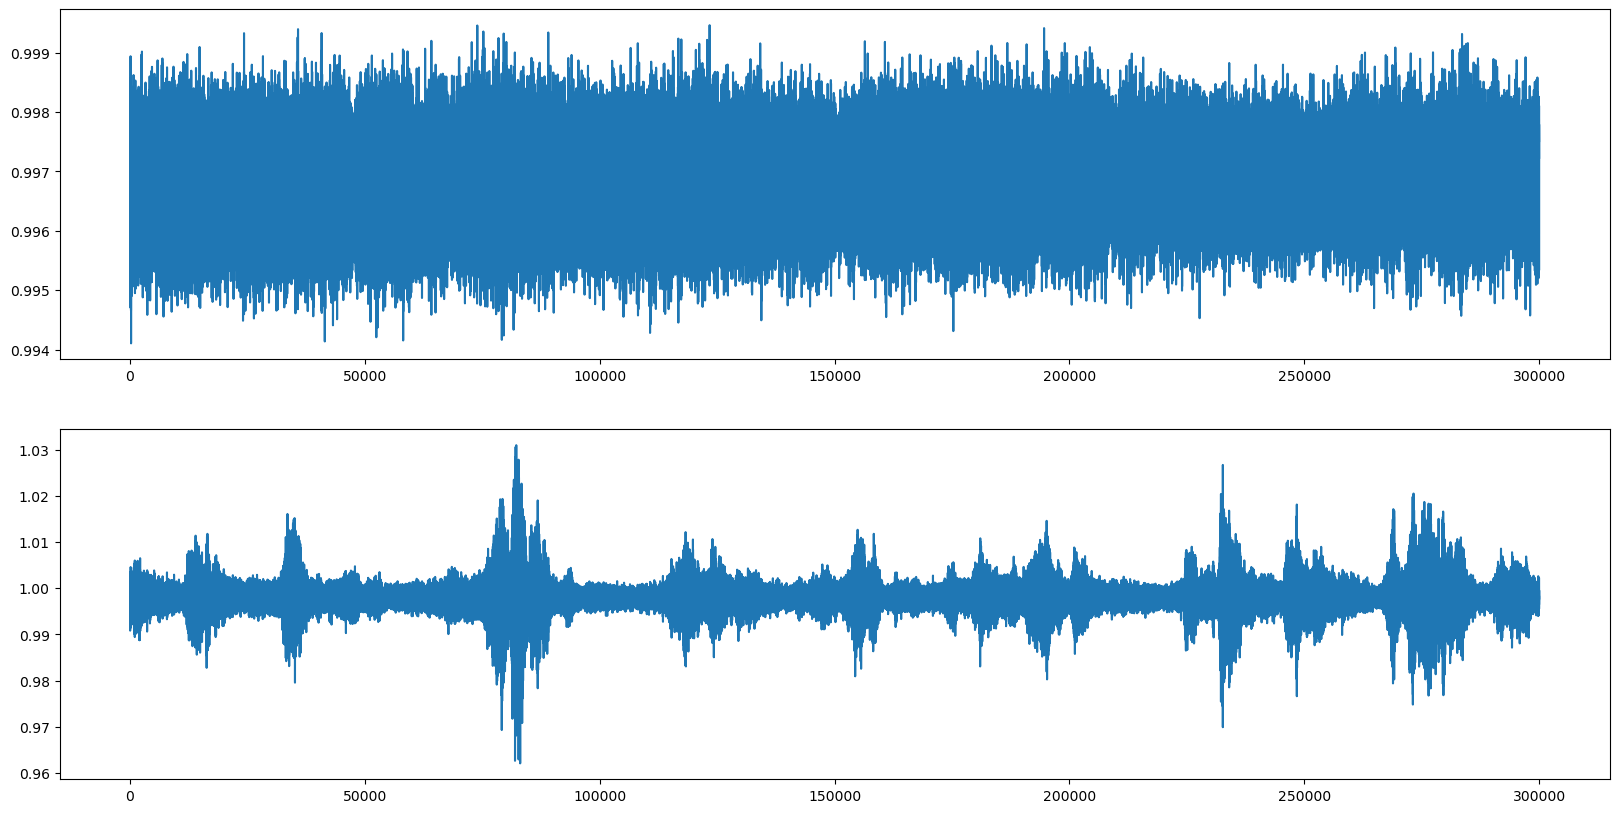

In [97]:
fig,ax=plt.subplots(nrows=2,figsize=(20,10))
ax[0].plot(data_spike['ACC3_Y'])
ax[1].plot(data_no_spike['ACC3_Y'])

In [99]:
print(compute_RMS(data_no_spike['ACC3_Z']))
print(compute_RMS(data_spike['ACC3_Z']))

0.090588376
0.087417416


In [78]:
from pathlib import Path
import pandas as pd

df=pd.read_parquet(Path('/media/yacine/Intenso/Data_processed/Stat/Stat_new.parquet'),columns=['RMS_ACC3_Z_mobile_MO04'])

In [95]:
df[df>0.025].dropna()

,RMS_ACC3_Z_mobile_MO04
timestamp,
2022-04-07 11:06:00+00:00,0.026551
2022-04-07 11:42:00+00:00,0.026863
2022-04-07 11:44:00+00:00,0.025467
2022-04-07 11:46:00+00:00,0.025294
2022-04-07 11:49:00+00:00,0.028363
...,...
2022-06-24 06:30:00+00:00,0.035163
2022-06-24 11:10:00+00:00,0.030739
2022-06-24 12:12:00+00:00,0.027428


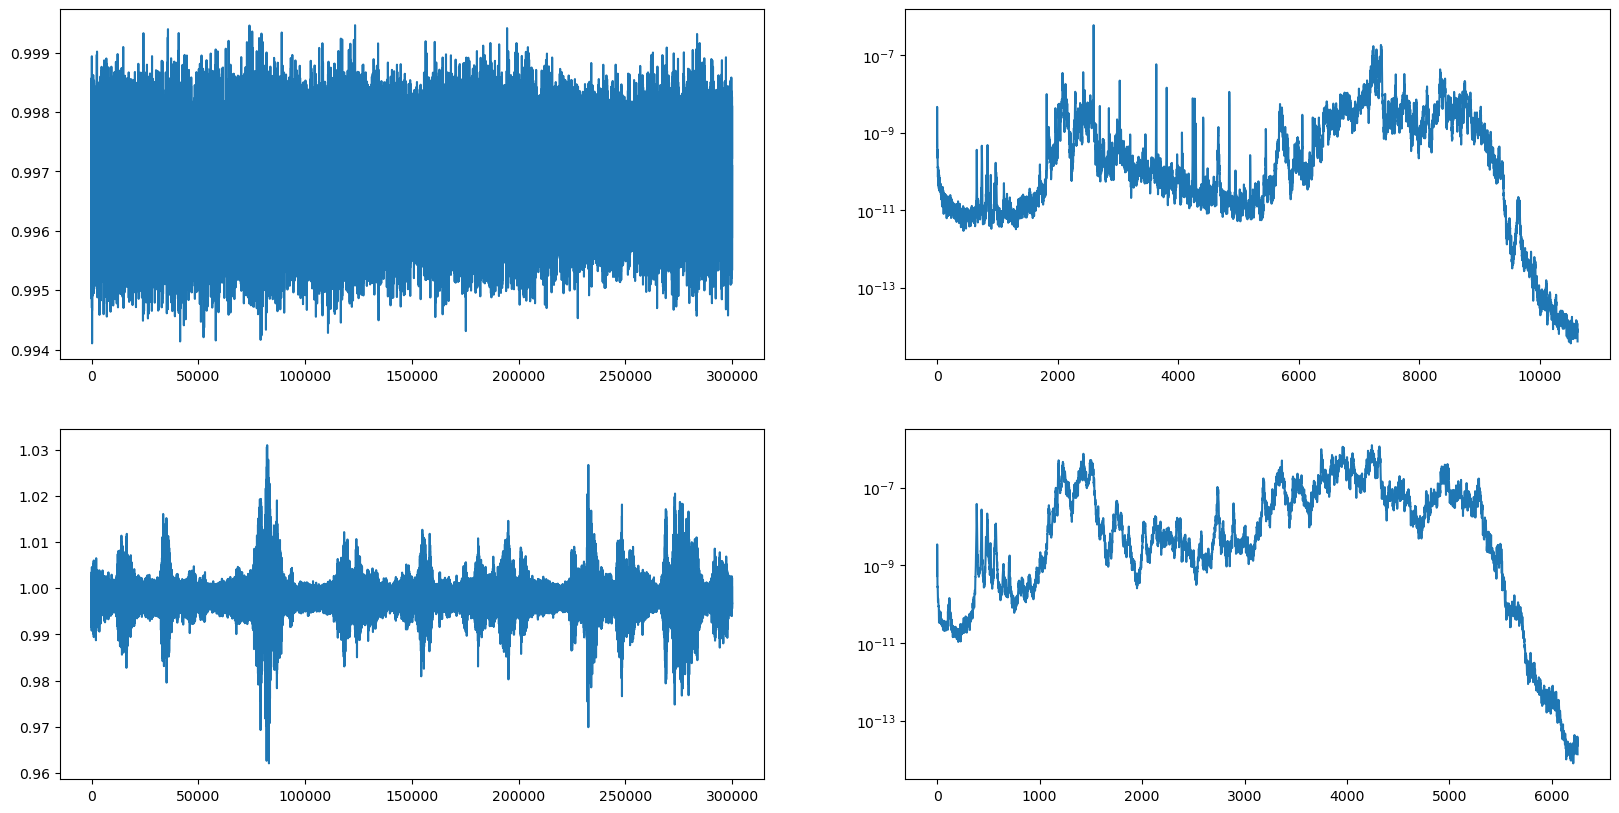

In [100]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
ax[0,1].plot(compute_PSD(data_spike['ACC3_Y'],tperseg=170,toverlap=160)[1].T)
ax[1,1].plot(compute_PSD(data_no_spike['ACC3_Y'],tperseg=100,toverlap=50)[1].T)
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].plot(data_spike['ACC3_Y'])
ax[1,0].plot(data_no_spike['ACC3_Y'])

In [52]:
import numpy as np
def compute_RMS(signal):
    return np.sqrt(np.mean(signal**2))

In [ ]:
start = datetime(2022,3,30,9,25,0)
while
end = start + timedelta(minutes=20)